Image segmentation and the watershed Algorithm

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

In [2]:
def display(img, cmap= None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

Our Task : Draw Contours Around the coins 

In [3]:
seep_coins = cv2.imread('pennies.png')

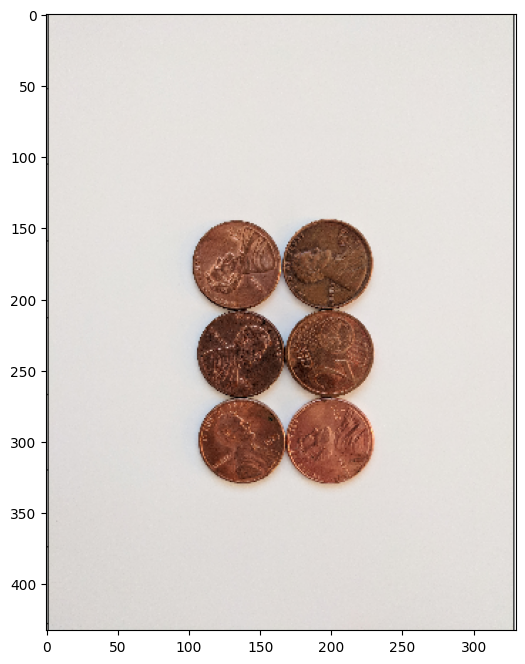

In [4]:
display(seep_coins)

In [5]:
# Apply Medium bluring 
#We have too much detail in this page, including ligt, the face edge on the coins and too much details in the background.
# lets use medium blur

In [6]:
seep_blur = cv2.medianBlur(seep_coins, 15)

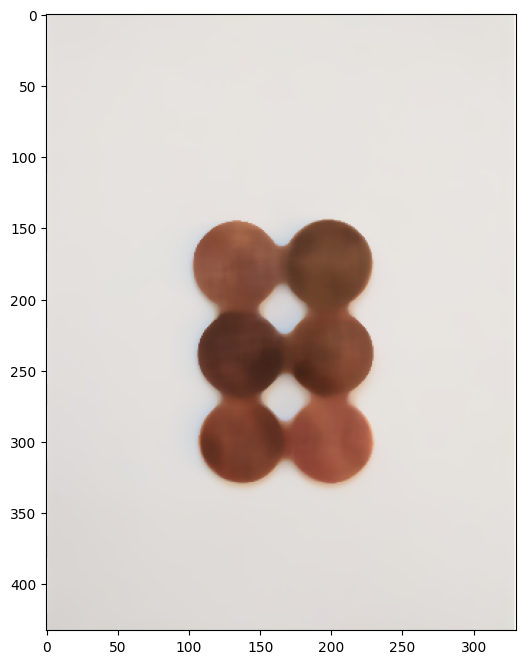

In [7]:
display(seep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(seep_blur, cv2.COLOR_BGR2GRAY)

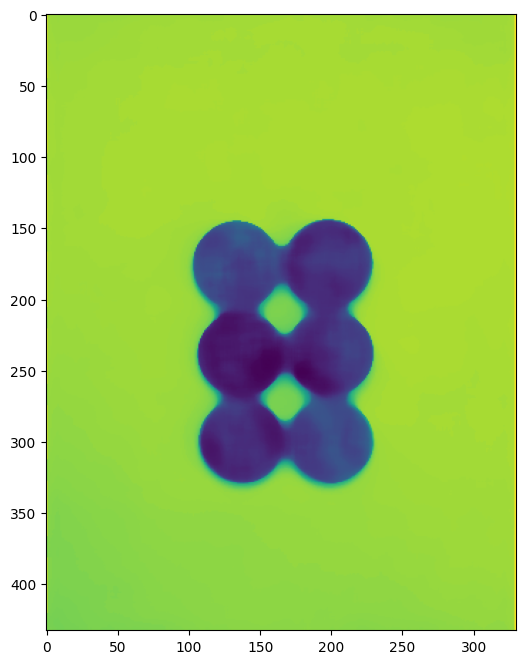

In [9]:
display(gray_sep_coins)

In [10]:
# Binary threshold 
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

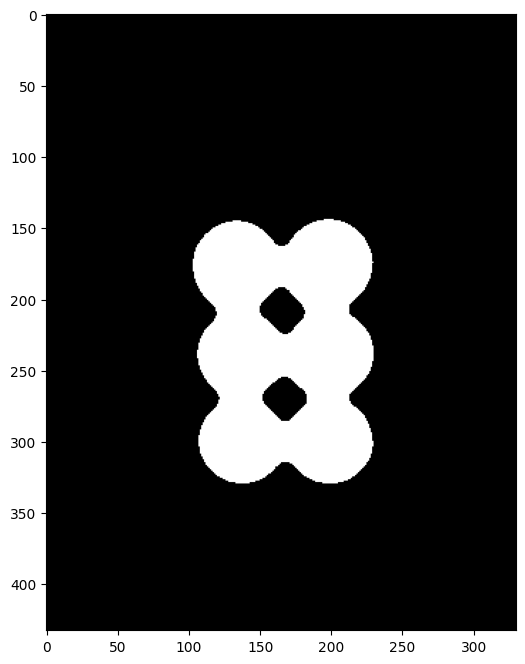

In [11]:
display(sep_thresh, cmap='gray')

Find Contours

In [13]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
# For every entry in the contours 
for i in range(len(contours)):
    # last column in the array is -1 if an external contours 
    if hierarchy[0][i][3] == -1:

        cv2.drawContours(seep_coins, contours, i, (255, 0, 0), 10)

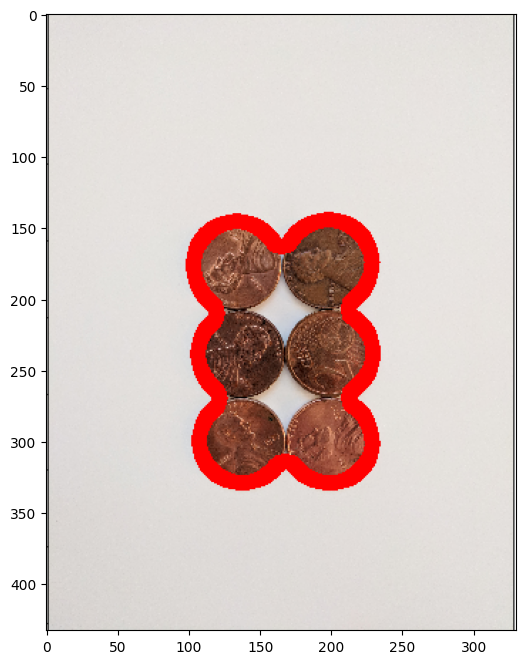

In [16]:
display(seep_coins)

Watershed Algorithm 
- Lets now try the watershed algorithm to draw contours around the pennies.

In [17]:
img = cv2.imread('pennies.png')

In [18]:
# Apply Blur 
img = cv2.medianBlur(img, 35)

In [23]:
# Convert to GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [24]:
#Apply threshold (Inverse binnary with OTSU as well )
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

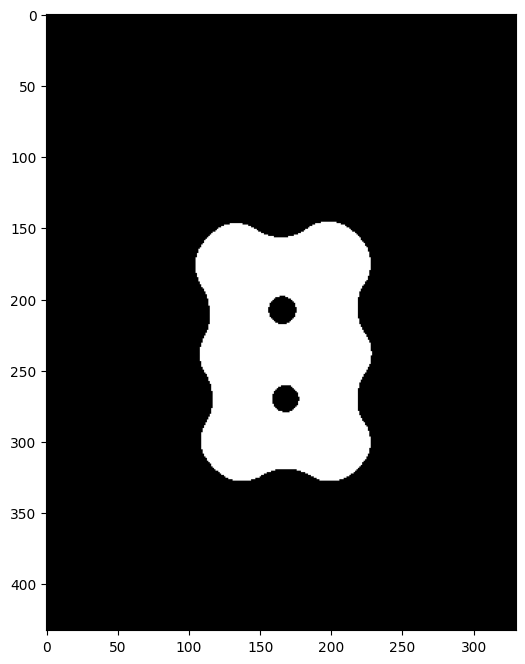

In [25]:
display(thresh, cmap='gray')

Noise Removal 

In [26]:
# noise removal 
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

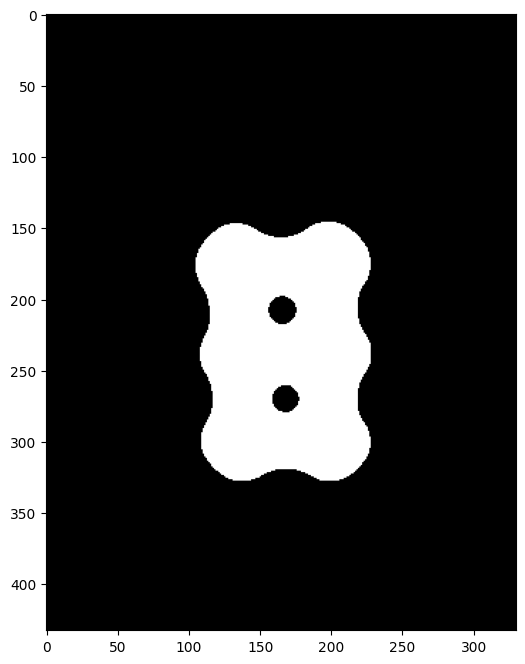

In [27]:
display(opening, cmap='gray')

In [28]:
# Sure background area 
sure_bg = cv2.dilate(opening, kernel, iterations=3)

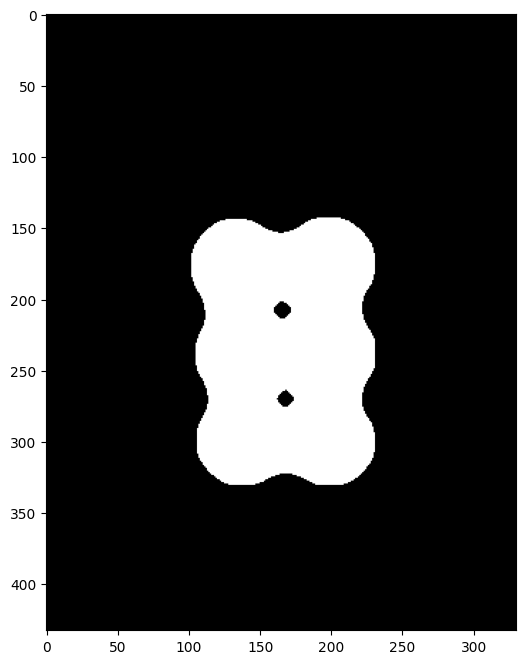

In [30]:
display(sure_bg, cmap='gray')

In [31]:
# finding sure foreground 
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

In [32]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

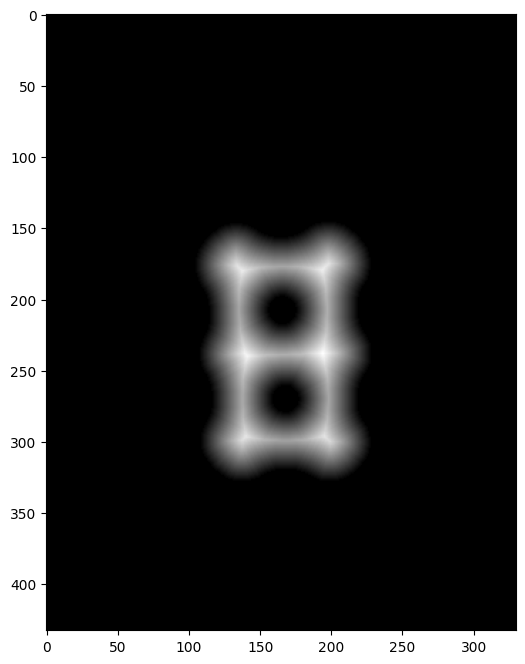

In [33]:
display(dist_transform, cmap='gray')

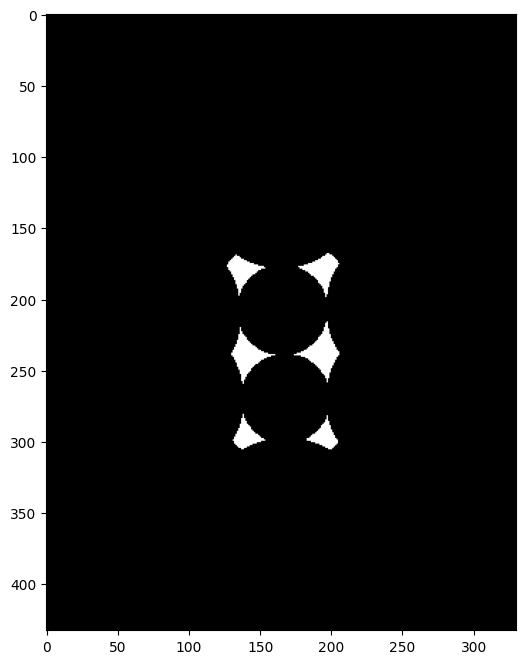

In [34]:
display(sure_fg, cmap='gray')

Find Unknown result

In [36]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

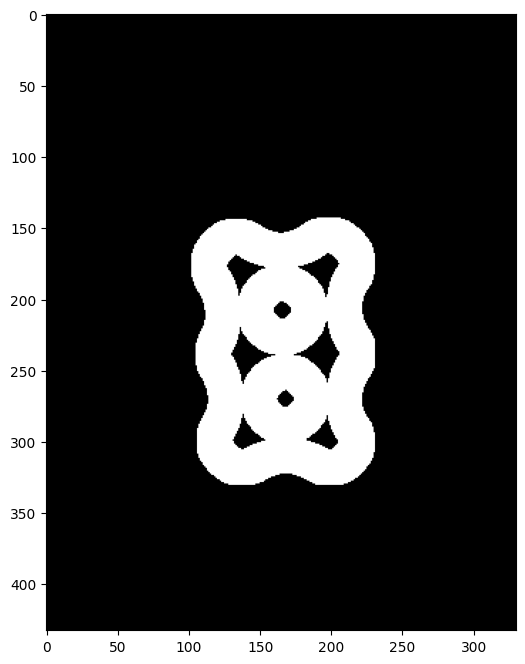

In [37]:
display(unknown, cmap='gray')

Label Markers of Sure Foreground

In [39]:
# Marker labelling 
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1
# Now mark the region of unkonown with zero 
markers[unknown==255] = 0

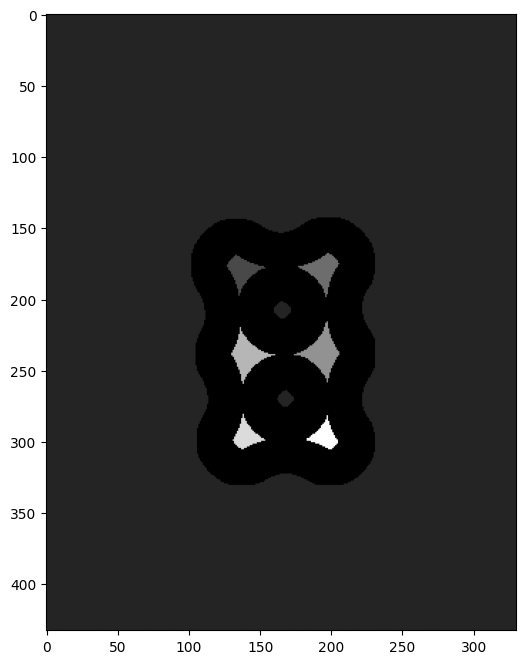

In [40]:
display(markers, cmap='gray')

Apply Watershed Algorithm to find Markers

In [41]:
markers = cv2.watershed(img, markers)

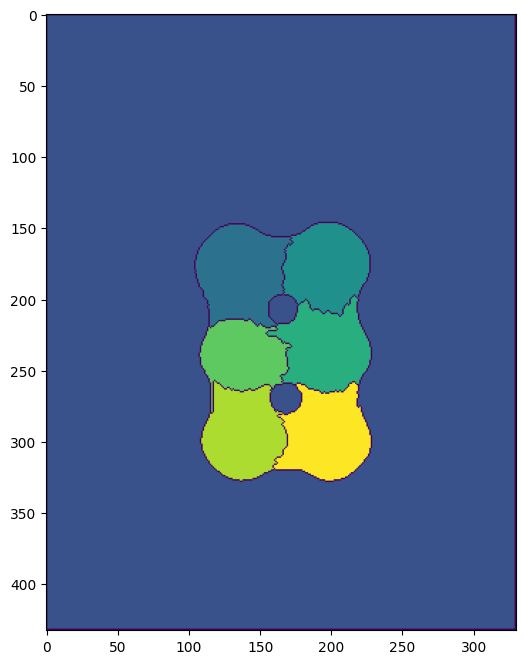

In [42]:
display(markers)

Find Contours on Markers 

In [45]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# for every entry in contours 
for i in range(len(contours)):

    # last column in the array is -1 if an external contours (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        #we can now draw the external contour (no contour inside of it)
        cv2.drawContours(seep_coins, contours, i, (255, 0, 0), 10)

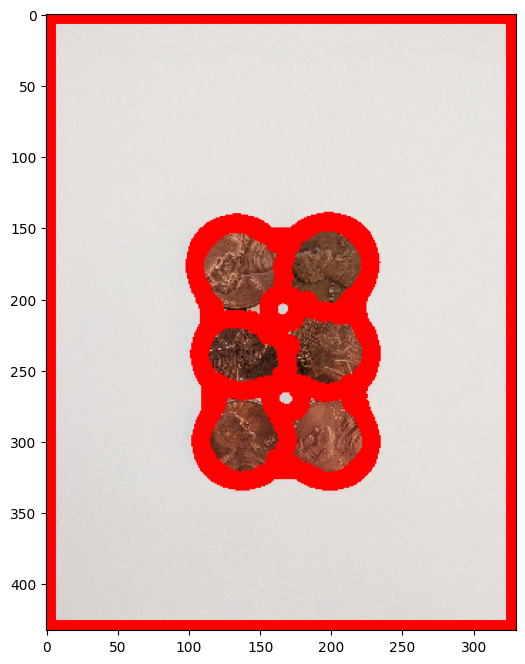

In [46]:
display(seep_coins)